<a href="https://colab.research.google.com/github/Michael-Jimenez-C/Investigaci-n-de-operaciones/blob/main/Tarea5IO/PD_deterministica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

class Grafo:
  def __init__(self,aristas, nodos):
    self.G=nx.DiGraph()
    self.aristas=aristas
    self.nodos=nodos
    for i in aristas:
      for j in i:
        self.G.add_edge(j[0],j[1],weight=j[2])

  def __hallar(self,origen,destino,i=-1,r={},min=True):
    if len(self.aristas)+i<0:
      return r
    for j in self.aristas[i]:
      if(j[1]==destino):
        r[j[0]]=(j[1],j[2])
      else:
        if not (j[0] in r):
          r[j[0]]=(None,np.infty if min else -np.infty)
        else:
          if (j[2]+r[j[1]][1])<r[j[0]][1] and min:
            r[j[0]]=(j[1],j[2]+r[j[1]][1])
          elif (j[2]+r[j[1]][1])>r[j[0]][1] and not min:
            r[j[0]]=(j[1],j[2]+r[j[1]][1])
    return self.__hallar(origen,destino,i-1,r,min)
    
  def caminoA(self,origen,destino,min=True):
    r=self.__hallar(origen,destino,min=min)
    camino=[origen]
    while camino[-1]!=destino:
      camino.append(r[camino[-1]][0])
    return camino,r[camino[0]][1]

In [82]:
class Graficador:
  def __init__(self,grafo:Grafo):
    self.grafo=grafo

  def calcularpos(self):
    pos={}
    for i in range(len(self.grafo.nodos)):
      for j in range(len(self.grafo.nodos[i])):
        pos[self.grafo.nodos[i][j]]=(i,(-j+(len(self.grafo.nodos[i])-1)/2))
    return pos
  
  def graficar(self,opcionesNodos,opcionesAristas):
    pos=self.calcularpos()
    plt.figure(figsize=(9,9))
    nx.draw_networkx(self.grafo.G, pos,**opcionesNodos)
    edge_labels = nx.get_edge_attributes(self.grafo.G, "weight")
    nx.draw_networkx_edge_labels(self.grafo.G, pos, edge_labels, **opcionesAristas)#edge_labels,label_pos=.8,rotate=False,font_size=12)
    ax = plt.gca()
    plt.axis("off")
    plt.tight_layout()
    plt.savefig("Grafo.pdf",dpi=500)
    return plt
  
  def graficarCamino(self,A,B,min,opcionesNodos,opcionesAristas):
    plt=self.graficar(opcionesNodos,opcionesAristas)
    sol=self.grafo.caminoA(A,B,min)[0]
    pos=self.calcularpos()
    Gs=self.grafo.G.subgraph(sol)

    edge_labels = nx.get_edge_attributes(Gs, "weight")
    nx.draw_networkx(Gs, pos,**opcionesNodos,edge_color="red")
    nx.draw_networkx_edge_labels(Gs, pos, edge_labels, **opcionesAristas)
    ax = plt.gca()
    plt.axis("off")
    plt.tight_layout()
    plt.savefig("Grafosolucion.pdf",dpi=500)
    return plt

#punto 1

In [83]:
aristas=[[(1,2,8),(1,3,7),(1,4,8)],
         
         [(2,5,9),(2,6,10),
         (3,5,5),(3,6,7),(3,7,5),(3,8,6),
         (4,7,8),(4,8,14)],
         
         [(5,9,8),(5,10,6),
         (6,9,4),(6,10,3),
         (7,9,11),(7,10,8),(7,11,7),
         (8,10,12),(8,11,6)],
         
         [(9,12,14),
         (10,12,6),
         (11,12,15)]]
nodos=[[1],[2,3,4],[5,6,7,8],[9,10,11],[12]]

In [84]:
G=Grafo(aristas,nodos)

In [85]:
opciones = {
    "font_size": 16,
    "node_size": 1500,
    "node_color": "white",
    "edgecolors": "green",
    "linewidths": 3,
    "width": 4
}

opcionesAristas={
    "label_pos":.8,
    "rotate":False,
    "font_size":12    
}

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

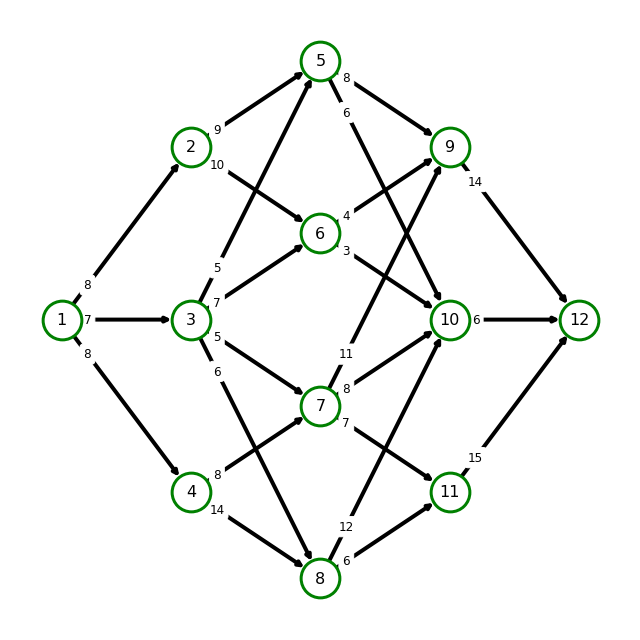

In [86]:
grafica=Graficador(G)
grafica.graficar(opciones,opcionesAristas)

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

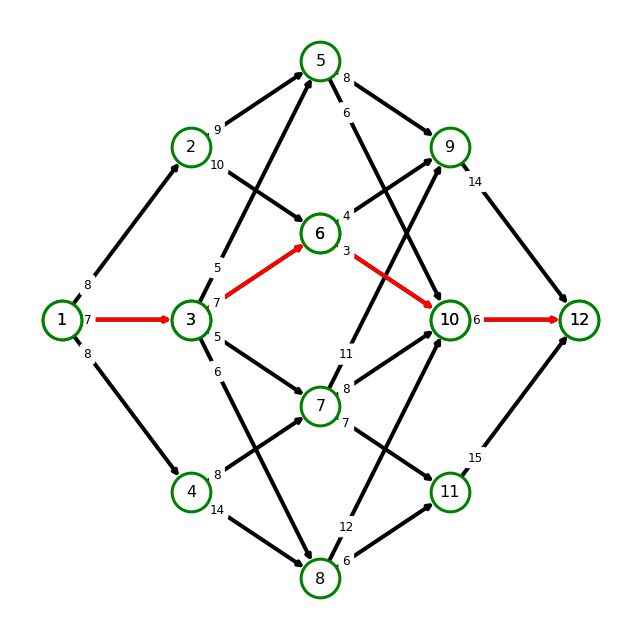

In [87]:
grafica.graficarCamino(1,12,True,opciones,opcionesAristas)

In [88]:
G.caminoA(1,12)

([1, 3, 6, 10, 12], 23)

#Asignacion

In [49]:
def asign(tabla):
  cmax=len(tabla)
  destinos=len(tabla[0])
  tabla=[[0 for i in range(destinos)]]+tabla
  nodos=[[str(cmax)]]+[[str(i)+'L'+str(j) for i in range(cmax+1)] for j in range(destinos-1)]+[['0F']]
  aristas=[]
  for i in range(len(nodos)-1):
    aristas.append([])
    for j in range(len(nodos[i])):
      l=(nodos[i+1] if i==0 or i==len(nodos)-2 else nodos[i+1][:j+1])
      s=int(nodos[i][j][0])
      aristas[-1]+=[(nodos[i][j],w[0],w[1]) for w in [(p,tabla[s-int(p[0])][i]) for p in l]]
  return nodos,aristas



In [55]:
tabla=[[40,24,32],
       [54,47,46],
       [78,63,70],
       [99,78,84]]

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

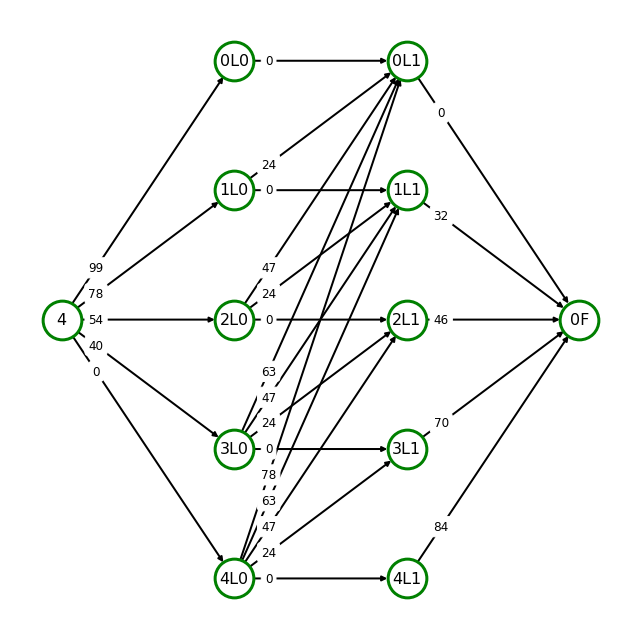

In [58]:
opciones = {
    "font_size": 16,
    "node_size": 1500,
    "node_color": "white",
    "edgecolors": "green",
    "linewidths": 3,
    "width": 2
}

nodos,aristas=asign(tabla)
G=Grafo(aristas,nodos)
grafica=Graficador(G)
grafica.graficar(opciones,opcionesAristas)

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

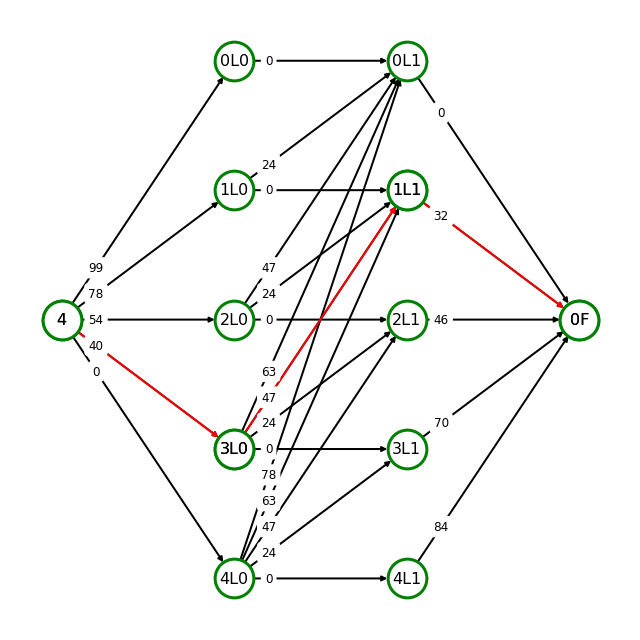

In [60]:
grafica.graficarCamino('4','0F',False,opciones,opcionesAristas)

In [61]:
G.caminoA('4','0F',False)

(['4', '3L0', '1L1', '0F'], 119)

#Punto 3

In [67]:
tabla=[[4,6,5,3],
       [7,8,9,7],
       [9,10,11,12],
       [12,11,10,14],
       [15,12,9,16]]

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

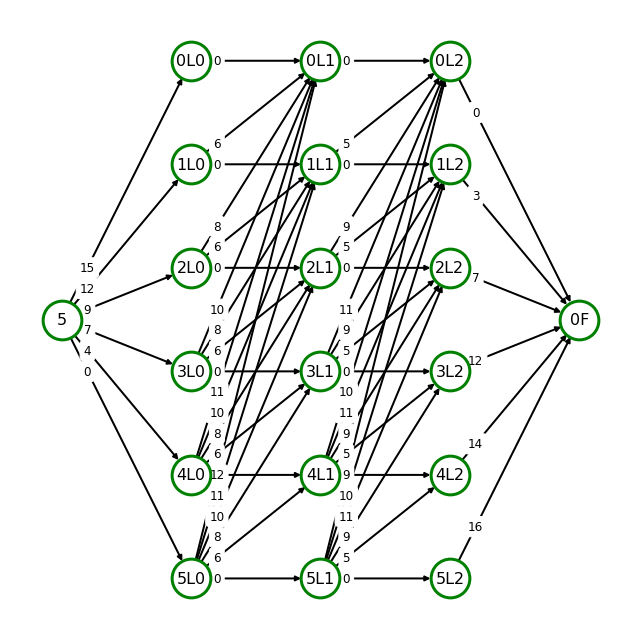

In [68]:
opciones = {
    "font_size": 16,
    "node_size": 1500,
    "node_color": "white",
    "edgecolors": "green",
    "linewidths": 3,
    "width": 2
}

nodos,aristas=asign(tabla)
G=Grafo(aristas,nodos)
grafica=Graficador(G)
grafica.graficar(opciones,opcionesAristas)

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

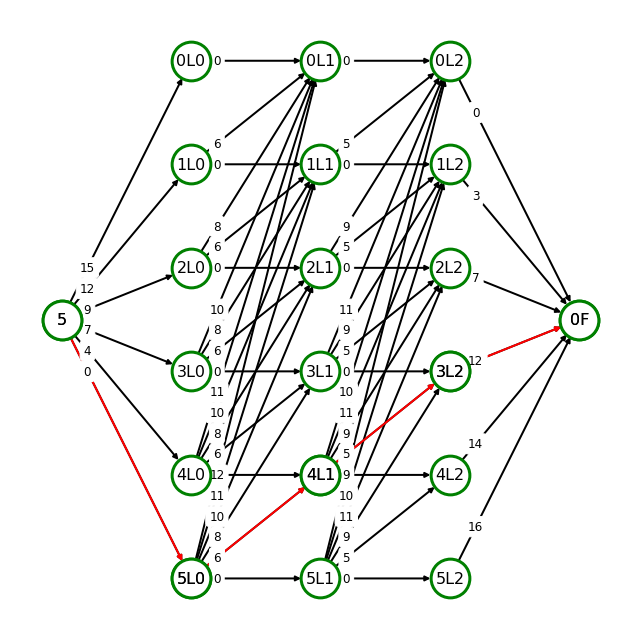

In [72]:
grafica.graficarCamino('5','0F',False,opciones,opcionesAristas)

In [75]:
G.caminoA('5','0F',False)

(['5', '5L0', '4L1', '3L2', '0F'], 23)